<img style="float: right;" src="figures/pylady_geek.png">

## How can I analyze my M/EEG dataset?
#### [Marie-Constance Corsi](https://marieconstance-corsi.netlify.app/), Aramis lab, Paris

## Overview

* Generalities
* EEG Visualization
* Preprocessing
* ERD/S Analysis
* Source reconstruction
* Functional connectivity & Bonus !
* Concluding remarks / FAQ

<img style="float: right;" src="figures/python.png" alt="drawing" width="120">

### Generalities

This demo relies on several open-source Python packages:

* [MNE-Python](https://mne.tools/stable/index.html) & [[Gramfort et al, 2014]](https://pubmed.ncbi.nlm.nih.gov/24161808/)
* [scikit-learn](https://scikit-learn.org/stable/)
* [Matplotlib](https://matplotlib.org/stable/index.html)
* [Seaborn](https://seaborn.pydata.org)
<img style="float: right;" src="figures/mne.png" alt="drawing" width="120">
* [Pyvis](https://pyvis.readthedocs.io/en/latest/tutorial.html)


The packages used for running this notebook are indicated in the requirements.txt file and could be installed with ``` pip install -r requirements.txt ```

#### Dataset
Use of an open dataset from [[Schalk et al, 2004]](https://ieeexplore.ieee.org/document/1300799)

#### /!\ Warning /!\
This demo aims at providing an overview of the main methods used to analyze M/EEG data. 
The choice and the parametrization of the methods may differ depending on your dataset and your hypothesis !

In [2]:
#Import the packages that will be used:
import mne
from mne.datasets import eegbci
from mne.io import concatenate_raws, read_raw_edf
import matplotlib.pyplot as plt

from warnings import simplefilter
#ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

#### Step 0: Load dataset & plot raw data

In [3]:
#Define the parameters
subject = 1  # use data from subject 1
runs = [6, 10, 14]  # use only hand and feet motor imagery runs

#Get data and locate in to given path
files = eegbci.load_data(subject, runs, '../datasets/')
#Read raw data files where each file contains a run
raws = [read_raw_edf(f, preload=True) for f in files]
#Combine all loaded runs
raw_obj = concatenate_raws(raws)

raw_data = raw_obj.get_data()
print("Number of channels: ", str(len(raw_data)))
print("Number of samples: ", str(len(raw_data[0])))

Extracting EDF parameters from /Users/marieconstance.corsi/Documents/GitHub/datasets/MNE-eegbci-data/files/eegmmidb/1.0.0/S001/S001R06.edf...
EDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
Fc5., Fc3., Fc1., Fcz., Fc2., Fc4., Fc6., C5.., C3.., C1.., Cz.., C2.., C4.., C6.., Cp5., Cp3., Cp1., Cpz., Cp2., Cp4., Cp6., Fp1., Fpz., Fp2., Af7., Af3., Afz., Af4., Af8., F7.., F5.., F3.., F1.., Fz.., F2.., F4.., F6.., F8.., Ft7., Ft8., T7.., T8.., T9.., T10., Tp7., Tp8., P7.., P5.., P3.., P1.., Pz.., P2.., P4.., P6.., P8.., Po7., Po3., Poz., Po4., Po8., O1.., Oz.., O2.., Iz..
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Extracting EDF parameters from /Users/marieconstance.corsi/Documents/GitHub/datasets/MNE-eegbci-data/files/eegmmidb/1.0.0/S001/S001R10.edf...
EDF file detected
Setting channel info structure...
Could not determine channel type of the following channel

In [4]:
import mne.viz
%matplotlib inline

Using matplotlib as 2D backend.


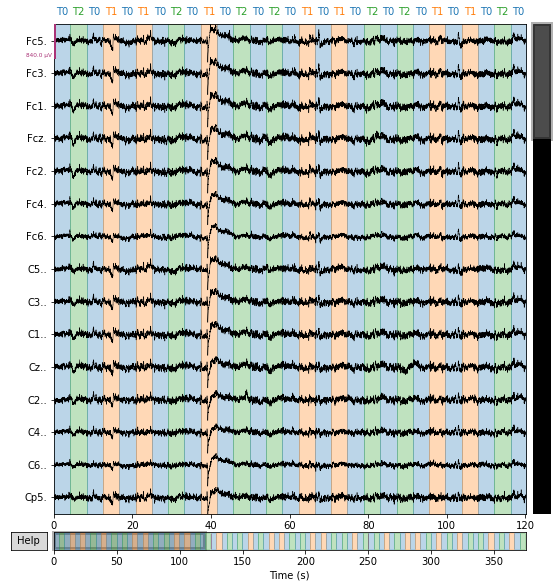

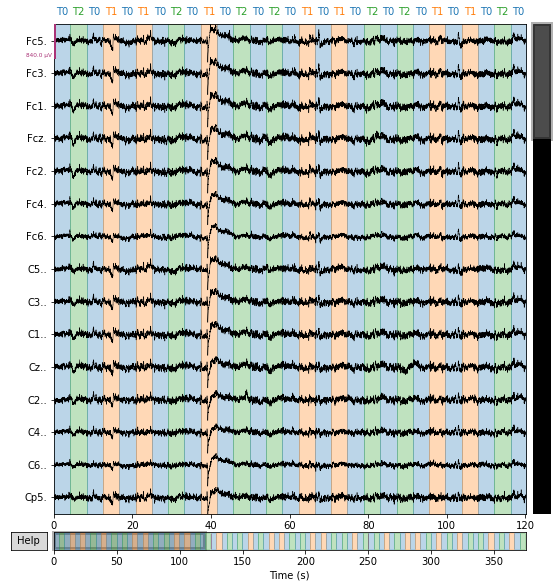

In [5]:
#Plot epochs
raw_obj.plot(duration=120, n_channels=15, scalings=dict(eeg=420e-6))

#### Step 1: Remove artifacts

In [6]:
# cf https://mne.tools/dev/auto_tutorials/preprocessing/plot_40_artifact_correction_ica.html#sphx-glr-auto-tutorials-preprocessing-plot-40-artifact-correction-ica-py
import os
import mne
from mne.preprocessing import (ICA, create_eog_epochs, create_ecg_epochs,
                               corrmap)

Extracting EDF parameters from /Users/marieconstance.corsi/Documents/GitHub/datasets/MNE-eegbci-data/files/eegmmidb/1.0.0/S001/S001R03.edf...
EDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
Fc5., Fc3., Fc1., Fcz., Fc2., Fc4., Fc6., C5.., C3.., C1.., Cz.., C2.., C4.., C6.., Cp5., Cp3., Cp1., Cpz., Cp2., Cp4., Cp6., Fp1., Fpz., Fp2., Af7., Af3., Afz., Af4., Af8., F7.., F5.., F3.., F1.., Fz.., F2.., F4.., F6.., F8.., Ft7., Ft8., T7.., T8.., T9.., T10., Tp7., Tp8., P7.., P5.., P3.., P1.., Pz.., P2.., P4.., P6.., P8.., Po7., Po3., Poz., Po4., Po8., O1.., Oz.., O2.., Iz..
Creating raw.info structure...
Fitting ICA to data using 64 channels (please be patient, this may take a while)
Selecting by number: 30 components


/opt/anaconda3/envs/tuto_meeg/lib/python3.8/site-packages/mne/utils/check.py:92: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LooseVersion(library.__version__) < LooseVersion(min_version):
/opt/anaconda3/envs/tuto_meeg/lib/python3.8/site-packages/mne/utils/check.py:92: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LooseVersion(library.__version__) < LooseVersion(min_version):
/var/folders/zr/jp94ly8d1vzdd9by_lpcbl6m000j9z/T/ipykernel_57406/3360423574.py:29: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Fitting ICA took 0.9s.


Extracting EDF parameters from /Users/marieconstance.corsi/Documents/GitHub/datasets/MNE-eegbci-data/files/eegmmidb/1.0.0/S002/S002R03.edf...
EDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
Fc5., Fc3., Fc1., Fcz., Fc2., Fc4., Fc6., C5.., C3.., C1.., Cz.., C2.., C4.., C6.., Cp5., Cp3., Cp1., Cpz., Cp2., Cp4., Cp6., Fp1., Fpz., Fp2., Af7., Af3., Afz., Af4., Af8., F7.., F5.., F3.., F1.., Fz.., F2.., F4.., F6.., F8.., Ft7., Ft8., T7.., T8.., T9.., T10., Tp7., Tp8., P7.., P5.., P3.., P1.., Pz.., P2.., P4.., P6.., P8.., Po7., Po3., Poz., Po4., Po8., O1.., Oz.., O2.., Iz..
Creating raw.info structure...
Fitting ICA to data using 64 channels (please be patient, this may take a while)
Selecting by number: 30 components


/opt/anaconda3/envs/tuto_meeg/lib/python3.8/site-packages/mne/utils/check.py:92: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LooseVersion(library.__version__) < LooseVersion(min_version):
/opt/anaconda3/envs/tuto_meeg/lib/python3.8/site-packages/mne/utils/check.py:92: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LooseVersion(library.__version__) < LooseVersion(min_version):
/var/folders/zr/jp94ly8d1vzdd9by_lpcbl6m000j9z/T/ipykernel_57406/3360423574.py:29: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Fitting ICA took 0.5s.


Extracting EDF parameters from /Users/marieconstance.corsi/Documents/GitHub/datasets/MNE-eegbci-data/files/eegmmidb/1.0.0/S003/S003R03.edf...
EDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
Fc5., Fc3., Fc1., Fcz., Fc2., Fc4., Fc6., C5.., C3.., C1.., Cz.., C2.., C4.., C6.., Cp5., Cp3., Cp1., Cpz., Cp2., Cp4., Cp6., Fp1., Fpz., Fp2., Af7., Af3., Afz., Af4., Af8., F7.., F5.., F3.., F1.., Fz.., F2.., F4.., F6.., F8.., Ft7., Ft8., T7.., T8.., T9.., T10., Tp7., Tp8., P7.., P5.., P3.., P1.., Pz.., P2.., P4.., P6.., P8.., Po7., Po3., Poz., Po4., Po8., O1.., Oz.., O2.., Iz..
Creating raw.info structure...
Fitting ICA to data using 64 channels (please be patient, this may take a while)
Selecting by number: 30 components


/opt/anaconda3/envs/tuto_meeg/lib/python3.8/site-packages/mne/utils/check.py:92: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LooseVersion(library.__version__) < LooseVersion(min_version):
/opt/anaconda3/envs/tuto_meeg/lib/python3.8/site-packages/mne/utils/check.py:92: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LooseVersion(library.__version__) < LooseVersion(min_version):
/var/folders/zr/jp94ly8d1vzdd9by_lpcbl6m000j9z/T/ipykernel_57406/3360423574.py:29: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Fitting ICA took 1.3s.


Extracting EDF parameters from /Users/marieconstance.corsi/Documents/GitHub/datasets/MNE-eegbci-data/files/eegmmidb/1.0.0/S004/S004R03.edf...
EDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
Fc5., Fc3., Fc1., Fcz., Fc2., Fc4., Fc6., C5.., C3.., C1.., Cz.., C2.., C4.., C6.., Cp5., Cp3., Cp1., Cpz., Cp2., Cp4., Cp6., Fp1., Fpz., Fp2., Af7., Af3., Afz., Af4., Af8., F7.., F5.., F3.., F1.., Fz.., F2.., F4.., F6.., F8.., Ft7., Ft8., T7.., T8.., T9.., T10., Tp7., Tp8., P7.., P5.., P3.., P1.., Pz.., P2.., P4.., P6.., P8.., Po7., Po3., Poz., Po4., Po8., O1.., Oz.., O2.., Iz..
Creating raw.info structure...
Fitting ICA to data using 64 channels (please be patient, this may take a while)
Selecting by number: 30 components


/opt/anaconda3/envs/tuto_meeg/lib/python3.8/site-packages/mne/utils/check.py:92: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LooseVersion(library.__version__) < LooseVersion(min_version):
/opt/anaconda3/envs/tuto_meeg/lib/python3.8/site-packages/mne/utils/check.py:92: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LooseVersion(library.__version__) < LooseVersion(min_version):
/var/folders/zr/jp94ly8d1vzdd9by_lpcbl6m000j9z/T/ipykernel_57406/3360423574.py:29: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Fitting ICA took 0.4s.
Using EOG channel: Fpz
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 1600 samples (10.000 sec)

... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutof

/opt/anaconda3/envs/tuto_meeg/lib/python3.8/site-packages/mne/utils/check.py:92: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LooseVersion(library.__version__) < LooseVersion(min_version):
/opt/anaconda3/envs/tuto_meeg/lib/python3.8/site-packages/mne/utils/check.py:92: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LooseVersion(library.__version__) < LooseVersion(min_version):
/opt/anaconda3/envs/tuto_meeg/lib/python3.8/site-packages/mne/viz/topomap.py:472: DeprecationWarning: Please use `Delaunay` from the `scipy.spatial` namespace, the `scipy.spatial.qhull` namespace is deprecated.
  from scipy.spatial.qhull import Delaunay


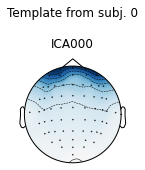

Median correlation with constructed map: 0.983
Displaying selected ICs per subject.
No maps selected for subject [1], consider a more liberal threshold.


/opt/anaconda3/envs/tuto_meeg/lib/python3.8/site-packages/mne/utils/check.py:92: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LooseVersion(library.__version__) < LooseVersion(min_version):
/opt/anaconda3/envs/tuto_meeg/lib/python3.8/site-packages/mne/utils/check.py:92: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LooseVersion(library.__version__) < LooseVersion(min_version):
/opt/anaconda3/envs/tuto_meeg/lib/python3.8/site-packages/mne/viz/topomap.py:472: DeprecationWarning: Please use `Delaunay` from the `scipy.spatial` namespace, the `scipy.spatial.qhull` namespace is deprecated.
  from scipy.spatial.qhull import Delaunay
/opt/anaconda3/envs/tuto_meeg/lib/python3.8/site-packages/mne/utils/check.py:92: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LooseVersion(library.__version__) < LooseVersion(min_version):
/opt/anaconda3/envs/tuto_meeg

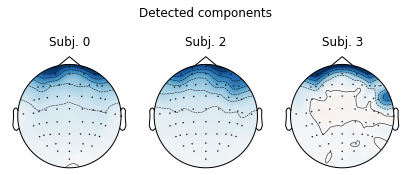

Creating RawArray with float64 data, n_channels=30, n_times=20000
    Range : 0 ... 19999 =      0.000 ...   124.994 secs
Ready.


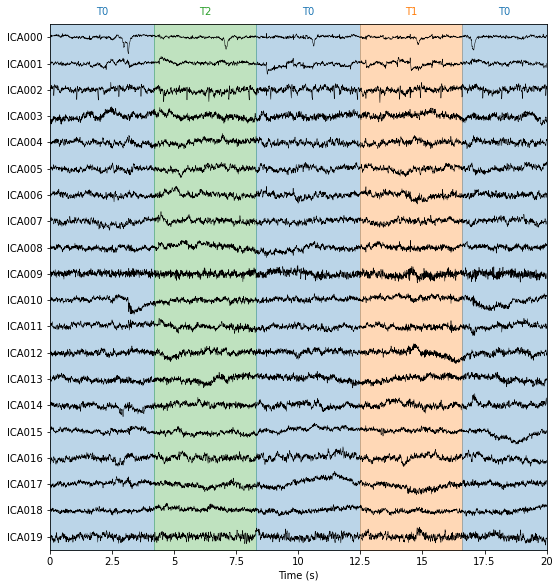

Creating RawArray with float64 data, n_channels=30, n_times=19680
    Range : 0 ... 19679 =      0.000 ...   122.994 secs
Ready.


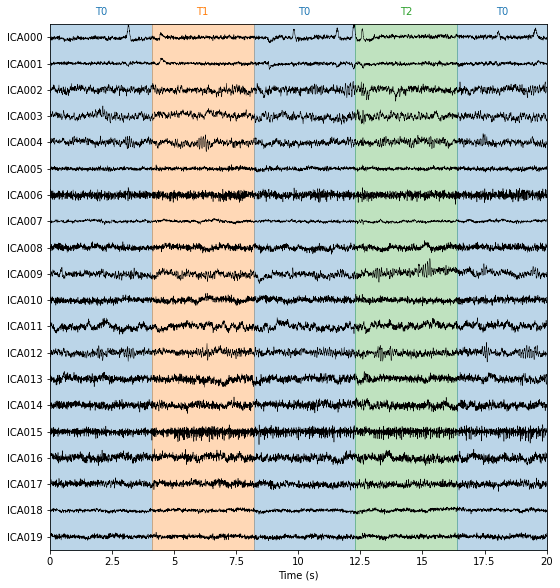

Creating RawArray with float64 data, n_channels=30, n_times=20000
    Range : 0 ... 19999 =      0.000 ...   124.994 secs
Ready.


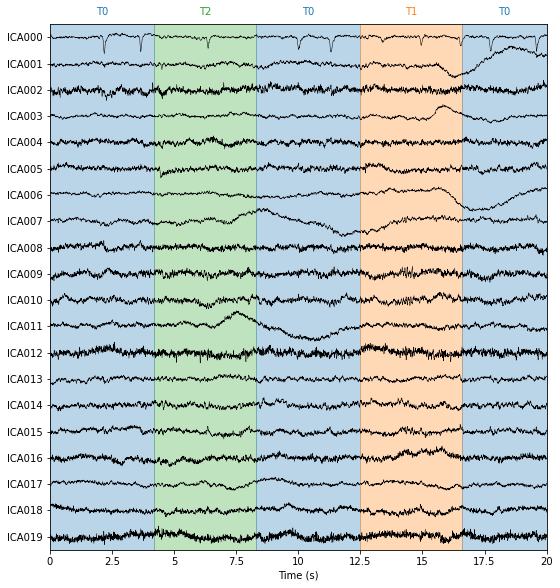

Creating RawArray with float64 data, n_channels=30, n_times=19680
    Range : 0 ... 19679 =      0.000 ...   122.994 secs
Ready.


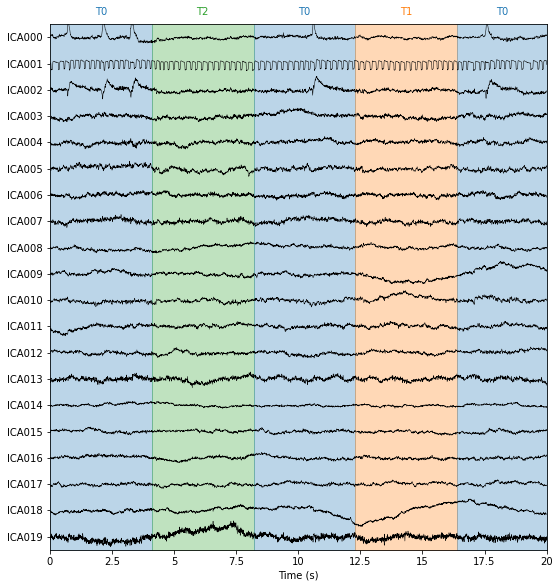

/opt/anaconda3/envs/tuto_meeg/lib/python3.8/site-packages/mne/utils/check.py:92: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LooseVersion(library.__version__) < LooseVersion(min_version):
/opt/anaconda3/envs/tuto_meeg/lib/python3.8/site-packages/mne/utils/check.py:92: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LooseVersion(library.__version__) < LooseVersion(min_version):
/opt/anaconda3/envs/tuto_meeg/lib/python3.8/site-packages/mne/viz/topomap.py:472: DeprecationWarning: Please use `Delaunay` from the `scipy.spatial` namespace, the `scipy.spatial.qhull` namespace is deprecated.
  from scipy.spatial.qhull import Delaunay


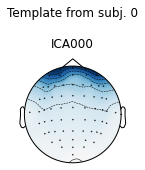

Median correlation with constructed map: 0.951
Displaying selected ICs per subject.
At least 1 IC detected for each subject.


/opt/anaconda3/envs/tuto_meeg/lib/python3.8/site-packages/mne/utils/check.py:92: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LooseVersion(library.__version__) < LooseVersion(min_version):
/opt/anaconda3/envs/tuto_meeg/lib/python3.8/site-packages/mne/utils/check.py:92: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LooseVersion(library.__version__) < LooseVersion(min_version):
/opt/anaconda3/envs/tuto_meeg/lib/python3.8/site-packages/mne/viz/topomap.py:472: DeprecationWarning: Please use `Delaunay` from the `scipy.spatial` namespace, the `scipy.spatial.qhull` namespace is deprecated.
  from scipy.spatial.qhull import Delaunay
/opt/anaconda3/envs/tuto_meeg/lib/python3.8/site-packages/mne/utils/check.py:92: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LooseVersion(library.__version__) < LooseVersion(min_version):
/opt/anaconda3/envs/tuto_meeg

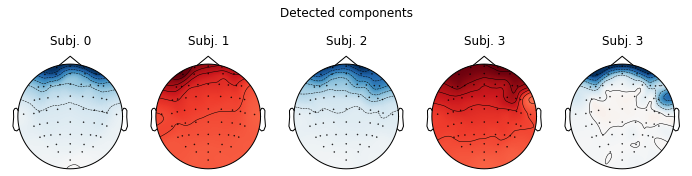

Median correlation with constructed map: 0.951
At least 1 IC detected for each subject.
[{'eog/0/Fpz': [0], 'eog': [0], 'blink': [0]}, {'blink': [0]}, {'blink': [0]}, {'blink': [0, 2]}]


/opt/anaconda3/envs/tuto_meeg/lib/python3.8/site-packages/mne/utils/check.py:92: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LooseVersion(library.__version__) < LooseVersion(min_version):
/opt/anaconda3/envs/tuto_meeg/lib/python3.8/site-packages/mne/utils/check.py:92: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LooseVersion(library.__version__) < LooseVersion(min_version):
/opt/anaconda3/envs/tuto_meeg/lib/python3.8/site-packages/mne/viz/topomap.py:472: DeprecationWarning: Please use `Delaunay` from the `scipy.spatial` namespace, the `scipy.spatial.qhull` namespace is deprecated.
  from scipy.spatial.qhull import Delaunay
/opt/anaconda3/envs/tuto_meeg/lib/python3.8/site-packages/mne/utils/check.py:92: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LooseVersion(library.__version__) < LooseVersion(min_version):
/opt/anaconda3/envs/tuto_meeg

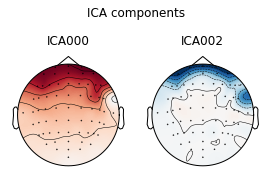

Creating RawArray with float64 data, n_channels=30, n_times=19680
    Range : 0 ... 19679 =      0.000 ...   122.994 secs
Ready.


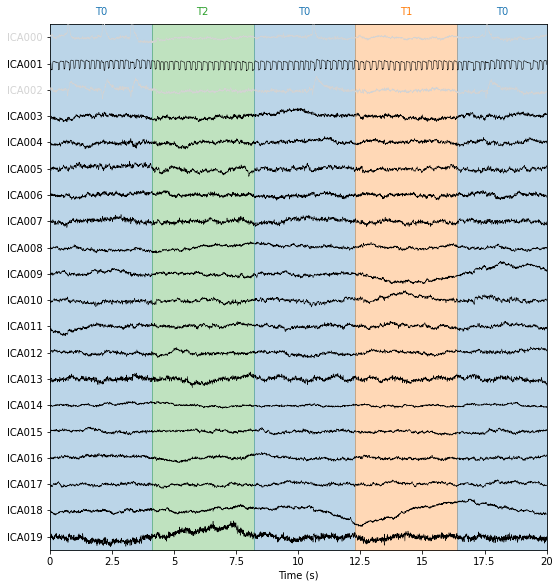

/opt/anaconda3/envs/tuto_meeg/lib/python3.8/site-packages/mne/utils/check.py:92: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LooseVersion(library.__version__) < LooseVersion(min_version):
/opt/anaconda3/envs/tuto_meeg/lib/python3.8/site-packages/mne/utils/check.py:92: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LooseVersion(library.__version__) < LooseVersion(min_version):
/opt/anaconda3/envs/tuto_meeg/lib/python3.8/site-packages/mne/viz/topomap.py:472: DeprecationWarning: Please use `Delaunay` from the `scipy.spatial` namespace, the `scipy.spatial.qhull` namespace is deprecated.
  from scipy.spatial.qhull import Delaunay


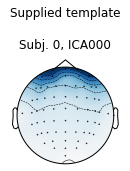

Median correlation with constructed map: 0.951
Displaying selected ICs per subject.
At least 1 IC detected for each subject.


/opt/anaconda3/envs/tuto_meeg/lib/python3.8/site-packages/mne/utils/check.py:92: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LooseVersion(library.__version__) < LooseVersion(min_version):
/opt/anaconda3/envs/tuto_meeg/lib/python3.8/site-packages/mne/utils/check.py:92: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LooseVersion(library.__version__) < LooseVersion(min_version):
/opt/anaconda3/envs/tuto_meeg/lib/python3.8/site-packages/mne/viz/topomap.py:472: DeprecationWarning: Please use `Delaunay` from the `scipy.spatial` namespace, the `scipy.spatial.qhull` namespace is deprecated.
  from scipy.spatial.qhull import Delaunay
/opt/anaconda3/envs/tuto_meeg/lib/python3.8/site-packages/mne/utils/check.py:92: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LooseVersion(library.__version__) < LooseVersion(min_version):
/opt/anaconda3/envs/tuto_meeg

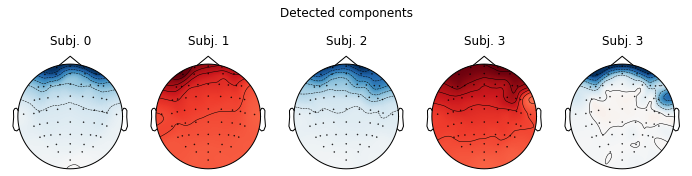

[-0.44495318 -0.40983842 -0.38930046 -0.37648581 -0.4081585  -0.43522276
 -0.47475364 -0.29240548 -0.28406613 -0.26882023 -0.25526935 -0.28871567
 -0.30326613 -0.30316262 -0.21016141 -0.22111437 -0.21807985 -0.207049
 -0.22375209 -0.24014921 -0.25321907 -1.68027772 -1.4824676  -1.62847163
 -1.40547681 -1.36613268 -0.85900872 -1.07936549 -1.52916767 -0.69233214
 -0.77286864 -0.65947637 -0.61444207 -0.59479909 -0.64739204 -0.65451653
 -0.76721442 -0.78455491 -0.38975992 -0.43540168 -0.24198818 -0.29395946
 -0.12909375 -0.16455719 -0.17778243 -0.18440583 -0.13619307 -0.16361049
 -0.17566436 -0.16126002 -0.16756067 -0.16994137 -0.18353601 -0.17522907
 -0.14012023 -0.09664031 -0.12390408 -0.12631576 -0.1284134  -0.09195589
 -0.09006861 -0.09628503 -0.06248746 -0.0248017 ]


In [7]:
mapping = {
    'Fc5.': 'FC5', 'Fc3.': 'FC3', 'Fc1.': 'FC1', 'Fcz.': 'FCz', 'Fc2.': 'FC2',
    'Fc4.': 'FC4', 'Fc6.': 'FC6', 'C5..': 'C5', 'C3..': 'C3', 'C1..': 'C1',
    'Cz..': 'Cz', 'C2..': 'C2', 'C4..': 'C4', 'C6..': 'C6', 'Cp5.': 'CP5',
    'Cp3.': 'CP3', 'Cp1.': 'CP1', 'Cpz.': 'CPz', 'Cp2.': 'CP2', 'Cp4.': 'CP4',
    'Cp6.': 'CP6', 'Fp1.': 'Fp1', 'Fpz.': 'Fpz', 'Fp2.': 'Fp2', 'Af7.': 'AF7',
    'Af3.': 'AF3', 'Afz.': 'AFz', 'Af4.': 'AF4', 'Af8.': 'AF8', 'F7..': 'F7',
    'F5..': 'F5', 'F3..': 'F3', 'F1..': 'F1', 'Fz..': 'Fz', 'F2..': 'F2',
    'F4..': 'F4', 'F6..': 'F6', 'F8..': 'F8', 'Ft7.': 'FT7', 'Ft8.': 'FT8',
    'T7..': 'T7', 'T8..': 'T8', 'T9..': 'T9', 'T10.': 'T10', 'Tp7.': 'TP7',
    'Tp8.': 'TP8', 'P7..': 'P7', 'P5..': 'P5', 'P3..': 'P3', 'P1..': 'P1',
    'Pz..': 'Pz', 'P2..': 'P2', 'P4..': 'P4', 'P6..': 'P6', 'P8..': 'P8',
    'Po7.': 'PO7', 'Po3.': 'PO3', 'Poz.': 'POz', 'Po4.': 'PO4', 'Po8.': 'PO8',
    'O1..': 'O1', 'Oz..': 'Oz', 'O2..': 'O2', 'Iz..': 'Iz'
}

raws = list()
icas = list()

for subj in range(4):
    # EEGBCI subjects are 1-indexed; run 3 is a left/right hand movement task
    fname = mne.datasets.eegbci.load_data(subj + 1, runs=[3])[0]
    raw = mne.io.read_raw_edf(fname)
    # remove trailing `.` from channel names so we can set montage
    raw.rename_channels(mapping)
    raw.set_montage('standard_1005')
    # fit ICA
    ica = ICA(n_components=30, random_state=97)
    ica.fit(raw)
    raws.append(raw)
    icas.append(ica)

# use the first subject as template; use Fpz as proxy for EOG
raw = raws[0]
ica = icas[0]
eog_inds, eog_scores = ica.find_bads_eog(raw, ch_name='Fpz')
corrmap(icas, template=(0, eog_inds[0]))

for index, (ica, raw) in enumerate(zip(icas, raws)):
    fig = ica.plot_sources(raw, show_scrollbars=False)
    fig.subplots_adjust(top=0.9)  # make space for title
    fig.suptitle('Subject {}'.format(index))

corrmap(icas, template=(0, eog_inds[0]), threshold=0.9)

corrmap(icas, template=(0, eog_inds[0]), threshold=0.9, label='blink',
        plot=False)
print([ica.labels_ for ica in icas])

icas[3].plot_components(picks=icas[3].labels_['blink'])
icas[3].exclude = icas[3].labels_['blink']
icas[3].plot_sources(raws[3], show_scrollbars=False)

template_eog_component = icas[0].get_components()[:, eog_inds[0]]
corrmap(icas, template=template_eog_component, threshold=0.9)
print(template_eog_component)

#### Step 2: Compute ERD/S maps

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import mne
from mne.datasets import eegbci
from mne.io import concatenate_raws, read_raw_edf
from mne.time_frequency import tfr_multitaper
from mne.stats import permutation_cluster_1samp_test as pcluster_test
from mne.viz.utils import center_cmap

In [9]:
# load and preprocess data ####################################################
subject = 1  # use data from subject 1
runs = [6, 10, 14]  # use only hand and feet motor imagery runs

fnames = eegbci.load_data(subject, runs)
raws = [read_raw_edf(f, preload=True) for f in fnames]
raw = concatenate_raws(raws)

raw.rename_channels(lambda x: x.strip('.'))  # remove dots from channel names

events, _ = mne.events_from_annotations(raw, event_id=dict(T1=2, T2=3))

picks = mne.pick_channels(raw.info["ch_names"], ["C3", "Cz", "C4"])

# epoch data ##################################################################
tmin, tmax = -1, 4  # define epochs around events (in s)
event_ids = dict(hands=2, feet=3)  # map event IDs to tasks

epochs = mne.Epochs(raw, events, event_ids, tmin - 0.5, tmax + 0.5,
                    picks=picks, baseline=None, preload=True)

Extracting EDF parameters from /Users/marieconstance.corsi/Documents/GitHub/datasets/MNE-eegbci-data/files/eegmmidb/1.0.0/S001/S001R06.edf...
EDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
Fc5., Fc3., Fc1., Fcz., Fc2., Fc4., Fc6., C5.., C3.., C1.., Cz.., C2.., C4.., C6.., Cp5., Cp3., Cp1., Cpz., Cp2., Cp4., Cp6., Fp1., Fpz., Fp2., Af7., Af3., Afz., Af4., Af8., F7.., F5.., F3.., F1.., Fz.., F2.., F4.., F6.., F8.., Ft7., Ft8., T7.., T8.., T9.., T10., Tp7., Tp8., P7.., P5.., P3.., P1.., Pz.., P2.., P4.., P6.., P8.., Po7., Po3., Poz., Po4., Po8., O1.., Oz.., O2.., Iz..
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Extracting EDF parameters from /Users/marieconstance.corsi/Documents/GitHub/datasets/MNE-eegbci-data/files/eegmmidb/1.0.0/S001/S001R10.edf...
EDF file detected
Setting channel info structure...
Could not determine channel type of the following channel

Not setting metadata
Applying baseline correction (mode: percent)
Using a threshold of 1.724718
stat_fun(H1): min=-8.523637 max=3.197747
Running initial clustering
Found 78 clusters
Permuting 99 times...


/opt/anaconda3/envs/tuto_meeg/lib/python3.8/site-packages/mne/externals/tqdm/__init__.py:5: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(__version__) < LooseVersion('4.36'):
/opt/anaconda3/envs/tuto_meeg/lib/python3.8/site-packages/mne/externals/tqdm/__init__.py:5: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(__version__) < LooseVersion('4.36'):


  0%|          |  : 0/99 [00:00<?,       ?it/s]

Computing cluster p-values
Step-down-in-jumps iteration #1 found 0 clusters to exclude from subsequent iterations
Done.
Using a threshold of -1.724718
stat_fun(H1): min=-8.523637 max=3.197747
Running initial clustering
Found 65 clusters
Permuting 99 times...


  0%|          |  : 0/99 [00:00<?,       ?it/s]

Computing cluster p-values
Step-down-in-jumps iteration #1 found 1 cluster to exclude from subsequent iterations
Permuting 99 times...


  0%|          |  : 0/99 [00:00<?,       ?it/s]

Computing cluster p-values
Step-down-in-jumps iteration #2 found 0 additional clusters to exclude from subsequent iterations
Done.
No baseline correction applied
Using a threshold of 1.724718
stat_fun(H1): min=-4.573067 max=3.687727
Running initial clustering
Found 85 clusters
Permuting 99 times...


  0%|          |  : 0/99 [00:00<?,       ?it/s]

Computing cluster p-values
Step-down-in-jumps iteration #1 found 1 cluster to exclude from subsequent iterations
Permuting 99 times...


  0%|          |  : 0/99 [00:00<?,       ?it/s]

Computing cluster p-values
Step-down-in-jumps iteration #2 found 0 additional clusters to exclude from subsequent iterations
Done.
Using a threshold of -1.724718
stat_fun(H1): min=-4.573067 max=3.687727
Running initial clustering
Found 57 clusters
Permuting 99 times...


  0%|          |  : 0/99 [00:00<?,       ?it/s]

Computing cluster p-values
Step-down-in-jumps iteration #1 found 0 clusters to exclude from subsequent iterations
Done.
No baseline correction applied
Using a threshold of 1.724718
stat_fun(H1): min=-6.599131 max=3.329547
Running initial clustering
Found 64 clusters
Permuting 99 times...


  0%|          |  : 0/99 [00:00<?,       ?it/s]

Computing cluster p-values
Step-down-in-jumps iteration #1 found 0 clusters to exclude from subsequent iterations
Done.
Using a threshold of -1.724718
stat_fun(H1): min=-6.599131 max=3.329547
Running initial clustering
Found 64 clusters
Permuting 99 times...


  0%|          |  : 0/99 [00:00<?,       ?it/s]

Computing cluster p-values
Step-down-in-jumps iteration #1 found 0 clusters to exclude from subsequent iterations
Done.
No baseline correction applied
Using a threshold of 1.713872
stat_fun(H1): min=-3.687815 max=3.369164
Running initial clustering
Found 66 clusters
Permuting 99 times...


/var/folders/zr/jp94ly8d1vzdd9by_lpcbl6m000j9z/T/ipykernel_57406/3404030111.py:47: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


  0%|          |  : 0/99 [00:00<?,       ?it/s]

Computing cluster p-values
Step-down-in-jumps iteration #1 found 0 clusters to exclude from subsequent iterations
Done.
Using a threshold of -1.713872
stat_fun(H1): min=-3.687815 max=3.369164
Running initial clustering
Found 75 clusters
Permuting 99 times...


  0%|          |  : 0/99 [00:00<?,       ?it/s]

Computing cluster p-values
Step-down-in-jumps iteration #1 found 0 clusters to exclude from subsequent iterations
Done.
No baseline correction applied
Using a threshold of 1.713872
stat_fun(H1): min=-5.046259 max=5.406477
Running initial clustering
Found 98 clusters
Permuting 99 times...


  0%|          |  : 0/99 [00:00<?,       ?it/s]

Computing cluster p-values
Step-down-in-jumps iteration #1 found 1 cluster to exclude from subsequent iterations
Permuting 99 times...


  0%|          |  : 0/99 [00:00<?,       ?it/s]

Computing cluster p-values
Step-down-in-jumps iteration #2 found 0 additional clusters to exclude from subsequent iterations
Done.
Using a threshold of -1.713872
stat_fun(H1): min=-5.046259 max=5.406477
Running initial clustering
Found 66 clusters
Permuting 99 times...


  0%|          |  : 0/99 [00:00<?,       ?it/s]

Computing cluster p-values
Step-down-in-jumps iteration #1 found 0 clusters to exclude from subsequent iterations
Done.
No baseline correction applied
Using a threshold of 1.713872
stat_fun(H1): min=-5.964817 max=4.078953
Running initial clustering
Found 92 clusters
Permuting 99 times...


  0%|          |  : 0/99 [00:00<?,       ?it/s]

Computing cluster p-values
Step-down-in-jumps iteration #1 found 1 cluster to exclude from subsequent iterations
Permuting 99 times...


  0%|          |  : 0/99 [00:00<?,       ?it/s]

Computing cluster p-values
Step-down-in-jumps iteration #2 found 0 additional clusters to exclude from subsequent iterations
Done.
Using a threshold of -1.713872
stat_fun(H1): min=-5.964817 max=4.078953
Running initial clustering
Found 52 clusters
Permuting 99 times...


  0%|          |  : 0/99 [00:00<?,       ?it/s]

Computing cluster p-values
Step-down-in-jumps iteration #1 found 0 clusters to exclude from subsequent iterations
Done.
No baseline correction applied


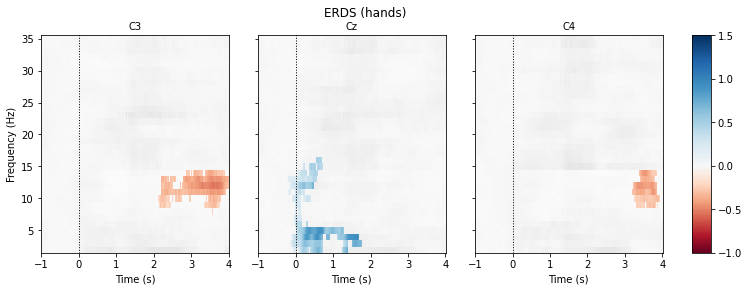

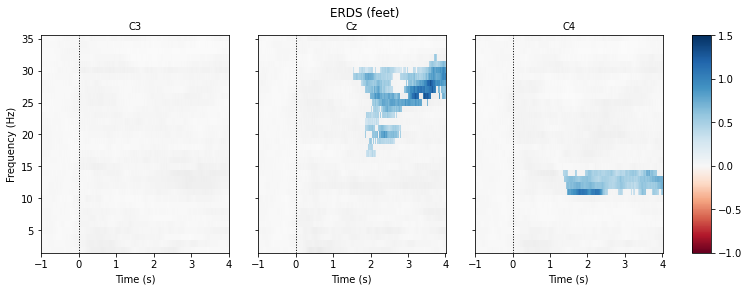

In [10]:
# compute ERDS maps ###########################################################
freqs = np.arange(2, 36, 1)  # frequencies from 2-35Hz
n_cycles = freqs  # use constant t/f resolution
vmin, vmax = -1, 1.5  # set min and max ERDS values in plot
baseline = [-1, 0]  # baseline interval (in s)
cmap = center_cmap(plt.cm.RdBu, vmin, vmax)  # zero maps to white
kwargs = dict(n_permutations=100, step_down_p=0.05, seed=1,
              buffer_size=None, out_type='mask')  # for cluster test

# Run TF decomposition overall epochs
tfr = tfr_multitaper(epochs, freqs=freqs, n_cycles=n_cycles,
                     use_fft=True, return_itc=False, average=False,
                     decim=2)
tfr.crop(tmin, tmax)
tfr.apply_baseline(baseline, mode="percent")
for event in event_ids:
    # select desired epochs for visualization
    tfr_ev = tfr[event]
    fig, axes = plt.subplots(1, 4, figsize=(12, 4),
                             gridspec_kw={"width_ratios": [10, 10, 10, 1]})
    for ch, ax in enumerate(axes[:-1]):  # for each channel
        # positive clusters
        _, c1, p1, _ = pcluster_test(tfr_ev.data[:, ch, ...], tail=1, **kwargs)
        # negative clusters
        _, c2, p2, _ = pcluster_test(tfr_ev.data[:, ch, ...], tail=-1,
                                     **kwargs)

        # note that we keep clusters with p <= 0.05 from the combined clusters
        # of two independent tests; in this example, we do not correct for
        # these two comparisons
        c = np.stack(c1 + c2, axis=2)  # combined clusters
        p = np.concatenate((p1, p2))  # combined p-values
        mask = c[..., p <= 0.05].any(axis=-1)

        # plot TFR (ERDS map with masking)
        tfr_ev.average().plot([ch], vmin=vmin, vmax=vmax, cmap=(cmap, False),
                              axes=ax, colorbar=False, show=False, mask=mask,
                              mask_style="mask")

        ax.set_title(epochs.ch_names[ch], fontsize=10)
        ax.axvline(0, linewidth=1, color="black", linestyle=":")  # event
        if ch != 0:
            ax.set_ylabel("")
            ax.set_yticklabels("")
    fig.colorbar(axes[0].images[-1], cax=axes[-1])
    fig.suptitle("ERDS ({})".format(event))
    fig.show()

### Step 3: Compute head model from an averaged reference [useful link](https://mne.tools/dev/auto_tutorials/source-modeling/plot_eeg_no_mri.html#sphx-glr-auto-tutorials-source-modeling-plot-eeg-no-mri-py)

In [11]:
# cf: https://mne.tools/dev/auto_tutorials/source-modeling/plot_eeg_no_mri.html#sphx-glr-auto-tutorials-source-modeling-plot-eeg-no-mri-py
# /!\ WARNING /!\: Source reconstruction without an individual T1 MRI from the subject will be less accurate. Do not over interpret activity locations which can be off by multiple centimeters.

import os.path as op
import numpy as np

import mne
from mne.datasets import eegbci
from mne.datasets import fetch_fsaverage

In [ ]:
# Download fsaverage files
fs_dir = fetch_fsaverage(verbose=True)
subjects_dir = op.dirname(fs_dir)

# The files live in:
subject = 'fsaverage'
trans = 'fsaverage'  # MNE has a built-in fsaverage transformation
src = op.join(fs_dir, 'bem', 'fsaverage-ico-5-src.fif')
bem = op.join(fs_dir, 'bem', 'fsaverage-5120-5120-5120-bem-sol.fif')

raw_fname, = eegbci.load_data(subject=1, runs=[6])
raw = mne.io.read_raw_edf(raw_fname, preload=True)

# Clean channel names to be able to use a standard 1005 montage
new_names = dict(
    (ch_name,
     ch_name.rstrip('.').upper().replace('Z', 'z').replace('FP', 'Fp'))
    for ch_name in raw.ch_names)
raw.rename_channels(new_names)

# Read and set the EEG electrode locations
montage = mne.channels.make_standard_montage('standard_1005')
raw.set_montage(montage)
raw.set_eeg_reference(projection=True)  # needed for inverse modeling

## Check that the locations of EEG electrodes is correct with respect to MRI
#mne.viz.plot_alignment(
 #   raw.info, src=src, eeg=['original', 'projected'], trans=trans,
 #   show_axes=True, mri_fiducials=True, dig='fiducials')

fwd = mne.make_forward_solution(raw.info, trans=trans, src=src,
                                bem=bem, eeg=True, mindist=5.0, n_jobs=1)
print(fwd)

## Use fwd to compute the sensitivity map for illustration purposes
#eeg_map = mne.sensitivity_map(fwd, ch_type='eeg', mode='fixed')
#brain = eeg_map.plot(time_label='EEG sensitivity', subjects_dir=subjects_dir,
                    # clim=dict(lims=[5, 50, 100]))

### Step 4: Compute inverse operator 

In [13]:
from mne.minimum_norm import make_inverse_operator, apply_inverse_epochs, read_inverse_operator
from mne.connectivity import spectral_connectivity
from mne.viz import circular_layout, plot_connectivity_circle

In [ ]:
evoked = epochs.average().pick('eeg')
#more suited for MEG, for EEG, the identity matrix works
noise_cov = mne.compute_covariance(
    epochs, tmax=0., method=['shrunk', 'empirical'], rank=None, verbose=True)
inverse_operator = make_inverse_operator(evoked.info, fwd, noise_cov, loose=0.2, depth=0.8)
del fwd

In [14]:
# Compute inverse solution and for each epoch. By using "return_generator=True"
# stcs will be a generator object instead of a list.
snr = 1.0  # use lower SNR for single epochs
lambda2 = 1.0 / snr ** 2
method = "dSPM"  # use dSPM method (could also be MNE or sLORETA)
stcs = apply_inverse_epochs(epochs, inverse_operator, lambda2, method,
                            pick_ori="normal", return_generator=True)

# Get labels for FreeSurfer 'aparc' cortical parcellation with 34 labels/hemi
labels = mne.read_labels_from_annot(
    'fsaverage', 'HCPMMP1', 'both', subjects_dir=subjects_dir)
label_colors = [label.color for label in labels]

# Average the source estimates within each label using sign-flips to reduce
# signal cancellations, also here we return a generator
src = inverse_operator['src']
label_ts = mne.extract_label_time_course(stcs, labels, src, mode='mean_flip',
                                         return_generator=True)

Reading labels from parcellation...
   read 181 labels from /Users/marieconstance.corsi/mne_data/MNE-fsaverage-data/fsaverage/label/lh.HCPMMP1.annot
   read 181 labels from /Users/marieconstance.corsi/mne_data/MNE-fsaverage-data/fsaverage/label/rh.HCPMMP1.annot


In [15]:
### Step 5: Compute functional connectivity estimators in source space

In [16]:
fmin = 8.
fmax = 13.
sfreq = raw_obj.info['sfreq']  # the sampling frequency
con_methods = ['pli', 'wpli2_debiased'] # connectivity estimators
con, freqs, times, n_epochs, n_tapers = spectral_connectivity(
    label_ts, method=con_methods, mode='multitaper', sfreq=sfreq, fmin=fmin,
    fmax=fmax, faverage=True, mt_adaptive=True, n_jobs=1)

Connectivity computation...
Preparing the inverse operator for use...
    Scaled noise and source covariance from nave = 1 to nave = 1
    Created the regularized inverter
    The projection vectors do not apply to these channels.
    Created the whitener using a noise covariance matrix with rank 3 (0 small eigenvalues omitted)
    Computing noise-normalization factors (dSPM)...
[done]
Picked 3 channels from the data
Computing inverse...
    Eigenleads need to be weighted ...
Processing epoch : 1 / 45
Extracting time courses for 362 labels (mode: mean_flip)
only using indices for lower-triangular matrix
    computing connectivity for 65341 connections
    using t=0.000s..6.000s for estimation (961 points)
    frequencies: 8.2Hz..13.0Hz (30 points)
    connectivity scores will be averaged for each band
    Using multitaper spectrum estimation with 7 DPSS windows
    the following metrics will be computed: PLI, Debiased WPLI Square, ciPLV
    computing connectivity for epoch 1
Processing

In [17]:
import seaborn as sns

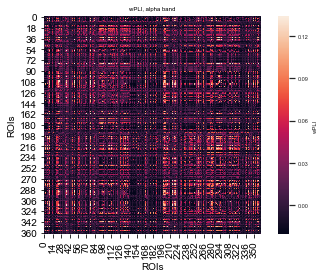

In [18]:
# plt adjacency matrices, con[1], ie wpli
matrix_wpli=con[1]
adj_wpli=np.squeeze(matrix_wpli)
adj_wpli = adj_wpli + adj_wpli.T - np.diag(np.diag(adj_wpli))

ax = plt.axes()
sns.set(font_scale=0.5)
data_heatmap=adj_wpli
svm = sns.heatmap ( data_heatmap, cbar_kws={'label': 'wPLI'} , square= True)
ax.set_ylim(len(data_heatmap)+0.5, -0.5) # pb cut off top/bottom - matplotlib issue
plt.xlabel("ROIs")
plt.ylabel("ROIs")
ax.set_title('wPLI, alpha band')
figure = svm.get_figure ()
plt.show ()

In [19]:
# con is a 3D array, get the connectivity for the first (and only) freq. band
# for each method
con_res = dict()
for method, c in zip(con_methods, con):
    con_res[method] = c[:, :, 0]

# First, we reorder the labels based on their location in the left hemi
label_names = [label.name for label in labels]

lh_labels = [name for name in label_names if name.endswith('lh')]

# Get the y-location of the label
label_ypos = list()
for name in lh_labels:
    idx = label_names.index(name)
    ypos = np.mean(labels[idx].pos[:, 1])
    label_ypos.append(ypos)

# Reorder the labels based on their location
lh_labels = [label for (yp, label) in sorted(zip(label_ypos, lh_labels))]

# For the right hemi
rh_labels = [label[:-2] + 'rh' for label in lh_labels]

# Save the plot order and create a circular layout
node_order = list()
node_order.extend(lh_labels[::-1])  # reverse the order
node_order.extend(rh_labels)

#node_angles = circular_layout(label_names, node_order, start_pos=90,
#                             group_boundaries=[0, len(label_names) / 2])


In [ ]:
#Plot the graph using node colors from the FreeSurfer parcellation.
#Show the 30 strongest connections.

no_names = [''] * len(label_names)
plot_connectivity_circle(con_res['wpli2_debiased'], no_names,
                         n_lines=30,
                         node_colors=label_colors,
                         title='Connectivity w/ wPLI')

### References:
* [[Corsi, 2022]](https://hal.inria.fr/hal-03604421) & its associated [Github repository](https://github.com/mccorsi/ML-for-Brain-Disorders_MEEG) -> main characteristics of EEG and MEG, for people with a machine learning background
* [[Gross et al, 2013]](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3925794/) -> M/EEG analysis guidelines
* [[Hari et al, 2012]](https://pubmed.ncbi.nlm.nih.gov/22166794/) -> MEG overview
* [[Pfurtscheller et al, 1999]](https://www.sciencedirect.com/science/article/abs/pii/S1388245799001418) -> event-related EEG/MEG (de)synchronization
* [[Gonzalez-Astudillo et al, 2020]](https://iopscience.iop.org/article/10.1088/1741-2552/abc760) -> review on brain networks in BCI

### To go further...
Here are useful references used to prepare this demo:
* [EEG Data Processing](https://neuro.inf.unibe.ch/AlgorithmsNeuroscience/Tutorial_files/DataVisualization.html)
* [MNE Time-Frequency tutorial](https://mne.tools/dev/auto_examples/time_frequency/plot_time_frequency_erds.html#sphx-glr-auto-examples-time-frequency-plot-time-frequency-erds-py)